# Árvore de decisão

### Base de dados: Forma de Trabalho Ideal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula e Hayala

Feito Por: João Vitor de Lima

-------------------------------------------------------------------------------






In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [2]:
df = pd.read_csv("dataset_tratado.csv")

print("\nDimensões:", df.shape)
print("\nCampos:", df.columns)
print(df.describe())


Dimensões: (4753, 24)

Campos: Index(['Idade', 'Gênero', 'Cor/Raça', 'Horas com trabalho doméstico e cuidado',
       'PCD', 'Estado onde mora', 'Região onde mora', 'Roubos de veículo',
       'Roubos de carro', 'Roubos de moto', 'Roubos de bicicleta',
       'Roubos fora do domicílio', 'Total de roubos', 'Nivel de segurança',
       'Nível de ensino', 'Área de formação', 'Situação atual de trabalho',
       'Cargo atual', 'Nível', 'Faixa salarial', 'Tempo de experiência',
       'Forma de trabalho atual',
       'Decisão da empresa para modelo 100% presencial',
       'Forma de trabalho ideal'],
      dtype='object')
             Idade  Horas com trabalho doméstico e cuidado  Roubos de veículo  \
count  4753.000000                             4753.000000        4753.000000   
mean     31.880497                               16.777383          67.830212   
std       7.271435                                0.389795          35.801513   
min      18.000000                               

In [3]:
# Separar variáveis independentes e alvo
X_dict = df.drop(columns=['Roubos de veículo',	'Roubos de carro',	'Roubos de moto', 'Roubos de bicicleta',	'Roubos fora do domicílio',	'Total de roubos', 'Forma de trabalho ideal']).to_dict(orient='records')
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(df['Forma de trabalho ideal'])

# Dividir os dados corretamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape dos dados de treino:", X_train.shape)
print("Shape dos dados de teste:", X_test.shape)

Shape dos dados de treino: (3802, 125)
Shape dos dados de teste: (951, 125)


In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Antes do SMOTE:", Counter(y_train))
smt = SMOTE(sampling_strategy='not majority', random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
print("Depois do SMOTE:", Counter(y_train))

Antes do SMOTE: Counter({np.int64(2): 2019, np.int64(1): 1708, np.int64(0): 75})
Depois do SMOTE: Counter({np.int64(2): 2019, np.int64(1): 2019, np.int64(0): 2019})


### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



Acurácia no treino: 0.8104672280006604
Acurácia no teste: 0.7108307045215563
              precision    recall  f1-score   support

           0       0.10      0.43      0.17        21
           1       0.76      0.74      0.75       416
           2       0.78      0.70      0.74       514

    accuracy                           0.71       951
   macro avg       0.55      0.62      0.55       951
weighted avg       0.76      0.71      0.73       951

[[  9   2  10]
 [ 16 309  91]
 [ 61  95 358]]
                             Prev=Modelo 100% presencial  \
Real=Modelo 100% presencial                            9   
Real=Modelo 100% remoto                               16   
Real=Modelo híbrido                                   61   

                             Prev=Modelo 100% remoto  Prev=Modelo híbrido  
Real=Modelo 100% presencial                        2                   10  
Real=Modelo 100% remoto                          309                   91  
Real=Modelo híbrido        

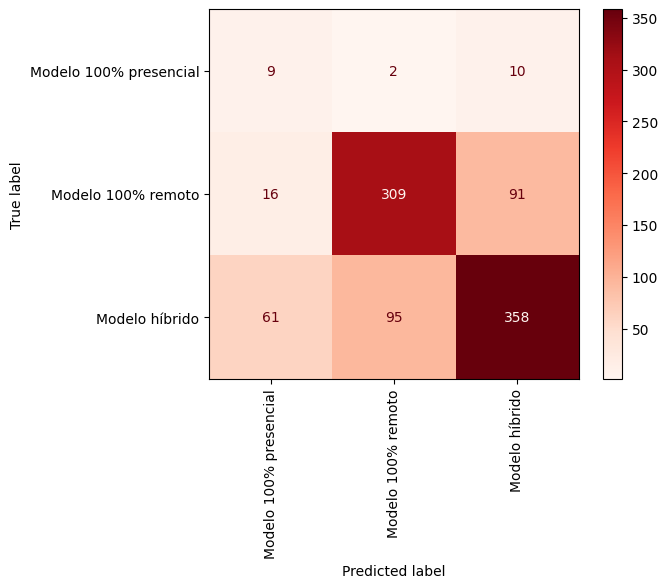

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Definir modelo com limitação de profundidade e folhas mínimas
treeForma = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5)
treeForma.fit(X_train, y_train)
print("Acurácia no treino:", treeForma.score(X_train, y_train))

# Avaliação no conjunto de teste
y_pred = treeForma.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
cnf_table = pd.DataFrame(cnf_matrix, index=[f"Real={c}" for c in le.classes_], columns=[f"Prev={c}" for c in le.classes_])
print(cnf_table)

display = ConfusionMatrixDisplay.from_estimator(treeForma, X_test, y_test, display_labels=le.classes_, cmap=plt.cm.Reds)

plt.xticks(rotation=90)
plt.show()


### Exibição da árvore de decisão



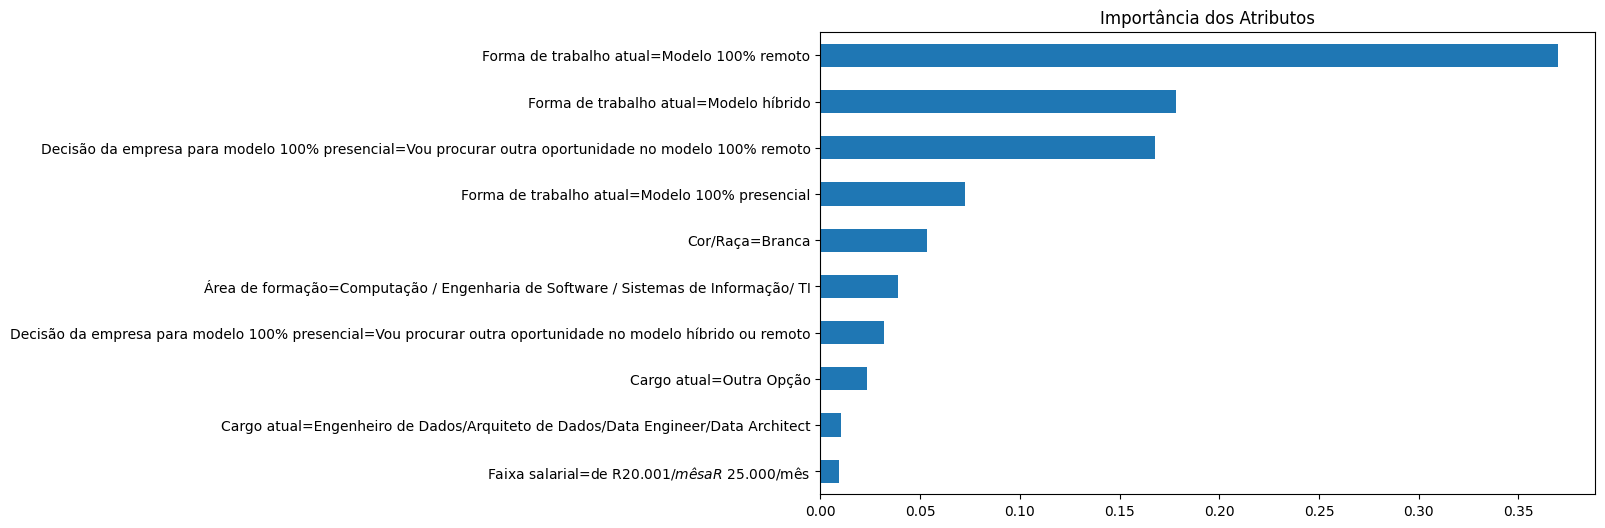

In [6]:
# Exibir importâncias dos atributos
importances = pd.Series(treeForma.feature_importances_, index=vect.feature_names_)
importances = importances[importances > 0].sort_values(ascending=False).head(10)

# Gerando um gráfico
importances.plot(kind='barh', figsize=(10, 6), title='Importância dos Atributos')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


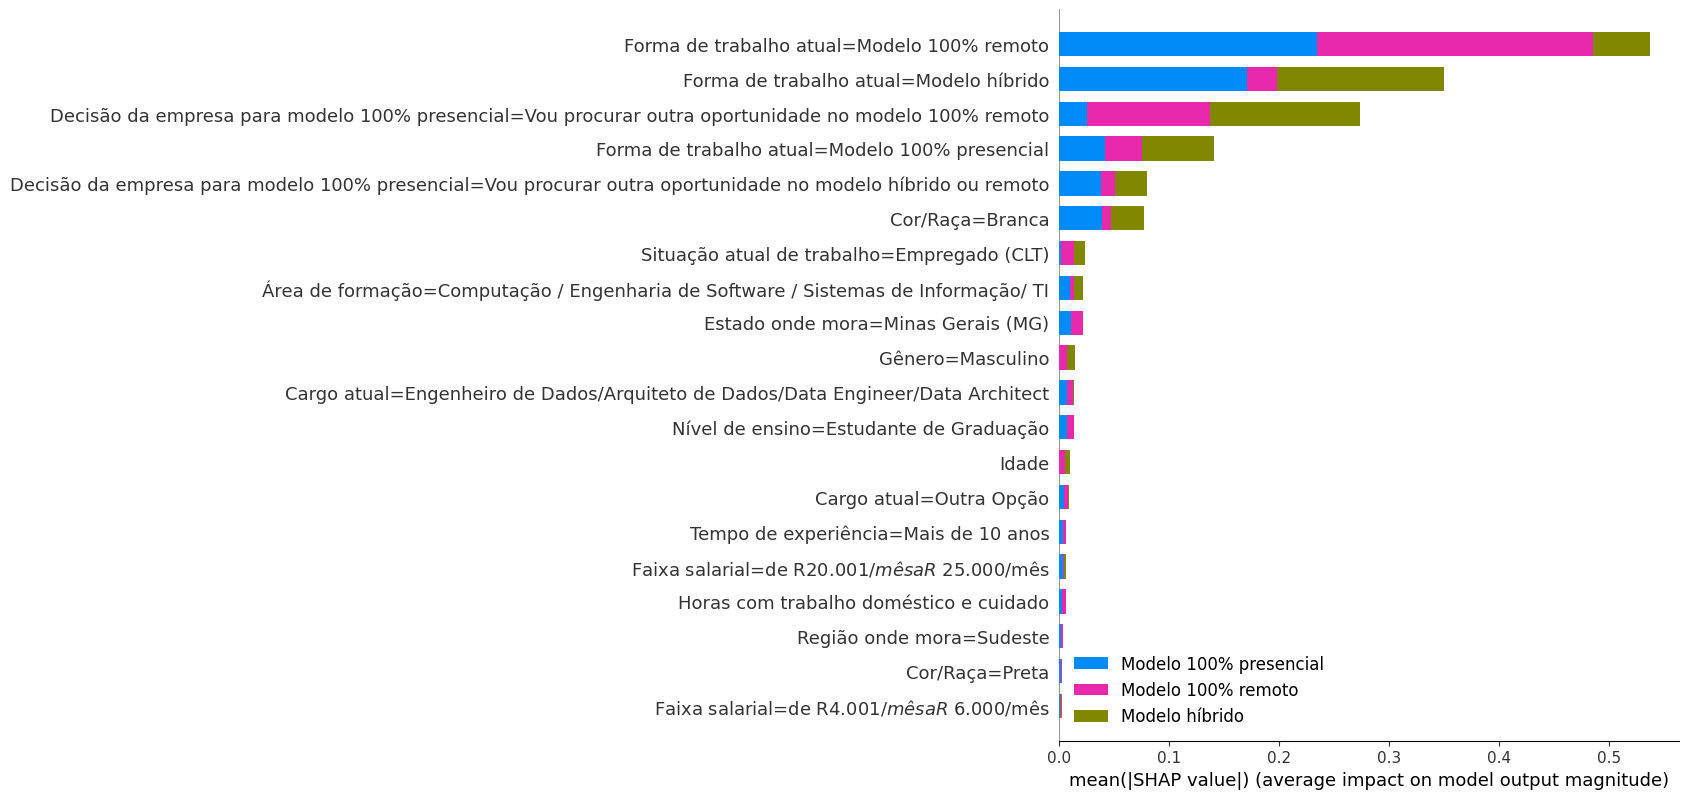

In [7]:
import shap
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

class_names = le.classes_

explainer = shap.TreeExplainer(treeForma)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=vect.get_feature_names_out(), plot_type='bar', class_names=class_names)

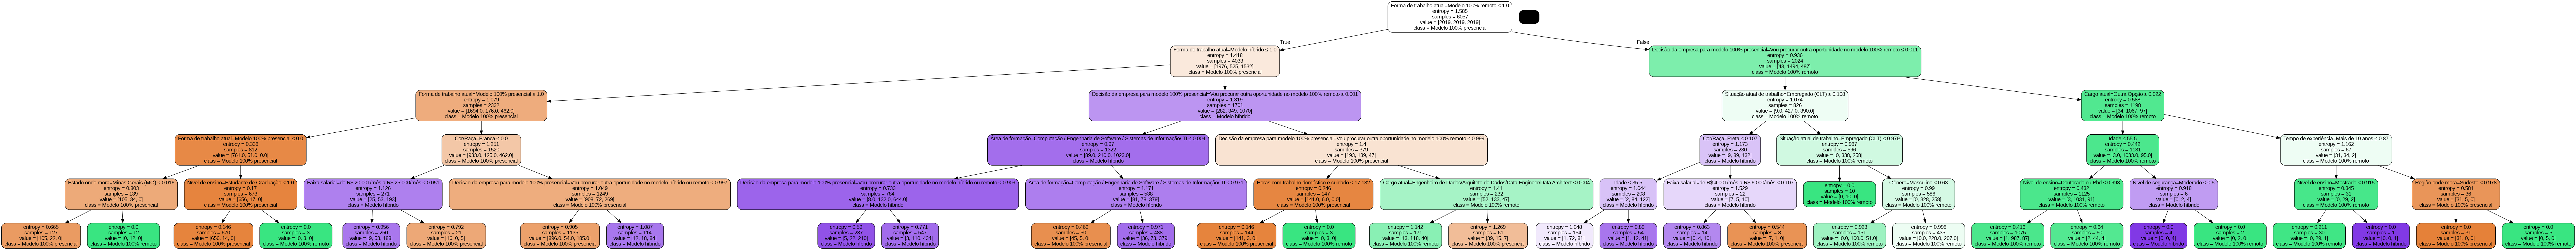

In [8]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(treeForma, out_file=None, feature_names=vect.get_feature_names_out(), class_names=le.classes_, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())